# Week 4: 2018/02/05-09

In [1]:
from tock import *

# Monday reading

Read Section 1.4, focusing on pages 77-79.

# Tuesday class

## Non-regular languages

We've seen that regular languages encompass all finite and cofinite languages, and three computational models (DFA, NFA, regular expression) turn out to recognize regular languages. Are there languages that aren't regular? Definitely -- the two classic examples are

$$ B = \{\mathtt{0}^n \mathtt{1}^n \mid n \geq 0\} $$
$$ G = \{w w^R \mid w \in \{\mathtt{0}, \mathtt{1}\}^\ast \} $$

The intuitive reason why is simple. If I give you two strings $u, v$, what information would you need about $u$ to decide whether $uv$ is in the language? Let's say that $L$ is the language of natural base-10 numbers that are divisible by 3. Recall that a number is divisible by 3 iff its digits sum to a multiple of 3. So the only information that you need about $u$ is the sum of its digits, _modulo 3_. That's a finite amount of information, so the language is regular.

Now consider $B$. If I give you $u=\mathtt{000001}$, the only $v$ that matches up with it is $v=\mathtt{1111}$. The information that you need about $u$ is how many $\mathtt{0}$'s it contains -- which can be unbounded. So, intuitively, this is not a regular language.

## The pumping lemma

But how do we really prove that $B$ is not regular? To do this, we entertain the possibility that it _is_ regular. If there were a DFA $M$ that recognizes $B$, we try to "break" it by finding a string that is _not_ in $B$ but _is_ accepted by $M$. If we show that we can break _all_ possible DFAs in this way, then that means we've shown that there is _no_ DFA that recognizes $B$. So $B$ is not regular.

The way that we are going to find the string that breaks $M$ involves a back-and-forth that is best thought of as a dialogue. Below, we imagine a dialogue between two people named Alice and Bill. Bill proposes $M$. Alice gives Bill a "test" string $s$ that $M$ is supposed to accept. But then, she uses the information that Bill reveals to concoct another string, and this is the one that breaks $M$.

## A dialogue

Alice. The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Bill. Yes it is!

Alice. Oh really, then show me a DFA that generates it.

Bill. Here's one:

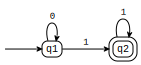

In [2]:
m = read_csv("pumping1.csv")
m

Alice. How many states does it have?

Bill. Let me see...

In [3]:
p = len(m.states)
p

2

Alice. Does your automaton accept the string $s = \texttt{0}^p \texttt{1}^p$?

In [4]:
s = ["0"]*p + ["1"]*p
s

['0', '0', '1', '1']

Bill. Of course...

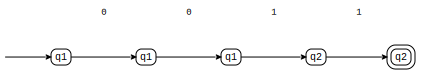

In [5]:
r = run(m, s)
r

Alice. Does this run uses a state twice while reading in the first half of the string?

Bill. Yes:

In [6]:
path = r.shortest_path()
visited = set()
for v in path[:p+1]:
    if v[0] in visited:
        q = v[0]
        break
    visited.add(v[0])
q

Store(['q1'])

Alice. What are the strings that it reads up to the first visit, between the first and second visits, and after the second visit?

In [7]:
indices = [i for i, v in enumerate(path) if v[0] == q]
x = s[:indices[0]]
y = s[indices[0]:indices[1]]
z = s[indices[1]:]
print x, y, z

[] ['0'] ['0', '1', '1']


Alice. So, does your automaton accept this string?

In [8]:
s2 = x + y*2 + z

Bill. Let's try it...

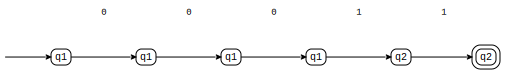

In [9]:
run(m, s2)

Bill. Doh!

## The dialogue, general version

In the dialogue above, Bill will lose no matter what automaton he produces. (You can try loading different automata to see what happens. If the automaton doesn't even accept $s$ in the first place, the dialogue will not make sense, but Bill still loses.) But it's not enough to try lots of automata; we need to show that Alice wins for _all_ automata. We now rewrite the dialogue with variables in place of Bill's responses to show that the argument works no matter what he says.

Alice. The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Bill. Yes it is! Here, I can show you an automaton that --

Alice. No, I don't need to see it. Just tell me how many states it has.

Bill. It has $p$ states.

Alice. Does it accept the string $s = \texttt{0}^p \texttt{1}^p$?

Bill. Yes.

Alice. On reading the first $p$ symbols of $s$, your automaton goes through $(p+1)$ configurations (the starting configuration plus one for each symbol). Since your automaton has only $p$ states, it must be the case, by the pigeonhole principle, that it visits the same state twice.

Bill. Yes.

Alice. What are the strings that it reads up to the first visit, between the first and second visits, and after the second visit?

Bill. $x$, $y$, and $z$.

Alice. Does your automaton also accept $xy^2z$?

Bill. Yes.

Alice. But $y$ consists of only $\texttt{0}$s, so $xy^2z$ has more $\texttt{0}$s than $\texttt{1}$s and does not belong to $B$.

Bill. Doh!

## The dialogue becomes a proof

Notice that Bill has been reduced to uttering variables and agreeing with Alice. So we can just write him out of the dialogue.

Claim: The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Proof: Suppose, for the sake of contradiction, that there is a finite automaton $M$ that generates $B$. Let $p$ be the number of states in $M$. By assumption, the string $s = \texttt{0}^p \texttt{1}^p$ is accepted by $M$. On reading the first $p$ symbols of $s$, $M$ goes through $(p+1)$ configurations (the starting configuration plus one for each symbol). Since $M$ has only $p$ states, it must be the case, by the pigeonhole principle, that it visits the same state twice. Let $x$ be the string read up to the first of those two visits, let $y$ be the string read between those two visits, and let $z$ be the rest of the string. Then $xy^2z$ must also be accepted by $M$. But $y$ must consist of only $\texttt{0}$s. So $xy^2z$ has more $\texttt{0}$s than $\texttt{1}$s. It does not belong to $B$, yet is accepted by $M$, which is a contradiction.

## The pumping lemma

If you were to write more and more of these proofs, however, you would find yourself making the same argument over and over. The pumping lemma is like a boilerplate non-regularity proof that you can use to simplify your proofs.

The lemma itself goes like this:

1. For all regular languages $A$,
2. there exists a $p \geq 1$ such that
3. for all $s \in A$ such that $|s| \geq p$,
4. there exist $x, y, z$ such that $s = xyz$, $|y| > 0$, $|xy| \leq p$ and
5. for all $i \geq 0$, $x y^i z \in A$.

And here is how you use it:

Claim: The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Proof: Suppose, for the sake of contradiction, that $L$ is regular. Let $p$ be the pumping length given by the pumping lemma (line 2). Let $s = \texttt{0}^p \texttt{1}^p$ (line 3). Then the pumping lemma writes $s$ as $xyz$, where $|xy| \leq p$ and $|y| > 0$ (line 4), which means that $y$ consists of only $\texttt{0}$s. Let $i=2$. The pumping lemma says (line 5) that $xy^iz \in B$, but $xy^iz$ contains more $\texttt{0}$s than $\texttt{1}$s, which is a contradiction.

The wording is admittedly awkward. The phrases "given by the pumping lemma" and "the pumping lemma writes" (the lines previously attributed to Bill) seem to come out of nowhere. The advantage is that this proof is shorter and doesn't need to make reference to an actual automaton. If you prefer to use the longer form, it's fine with me. But, regardless, you need to understand the argument, and it's critical that you remember which variables you get to choose and which variables you don't get to choose. Your job, as Alice, is to choose $s$ (line 3) and $i$ (line 5), and to produce a contradiction, namely, that $xy^iz \notin L$. Bill chooses $p$ (line 2) and $xyz$ (line 4); since you don't get to choose them, you must write your argument to work for any values of $p$ and $xyz$.

# Wednesday reading

Re-read Section 1.4, paying closer attention this time to pages 80-82.

# Thursday class

Course Project 1 is due tonight.

## More practice with the pumping lemma

**Question.** Prove that $L = \{ ww^R \mid w \in \{\mathtt{0},\mathtt{1}\}^\ast\}$ is not regular.

**Question.** Prove that $C = \{w \in \{\mathtt{0}, \mathtt{1}\}^\ast \mid \text{$w$ contains an equal number of $\mathtt{0}$'s and $\mathtt{1}$'s}\}$ is not regular.

## Using closure properties

Example 1.74 mentions an alternative proof strategy that involves the fact that regular languages are closed under intersection (footnote 3 of this chapter, a very important footnote!). This is an extremely common technique that lets you filter out strings that you don't want to deal with.

**Question.** Prove that $C = \{w \in \{\mathtt{0}, \mathtt{1}\}^\ast \mid \text{$w$ contains an equal number of $\mathtt{0}$'s and $\mathtt{1}$'s}\}$ is not regular, by intersecting with the language $\mathtt{0}^\ast\mathtt{1}^\ast$.

Another commonly used property is closure under string homomorphisms (Exercise 1.66, 3rd ed. only). Any mapping $f : \Sigma \rightarrow \Sigma^\ast$ from symbols to strings can be extended to a mapping from strings to strings, called a string homomorphism, defined as follows:

\begin{align*}
f(\varepsilon) &= \epsilon \\
f(uv) &= f(u) f(v).
\end{align*}

For example, if $\Sigma = \{\mathtt{a}, \mathtt{b}\}$, and $f(\mathtt{a}) = \mathtt{a}, f(\mathtt{b}) = \varepsilon$, then $f$ extended to be a string homomorphism deletes all the $\mathtt{b}$'s from a string. So this closure property lets you filter out symbols that you don't want to deal with. It also lets you conflate symbols that you don't need to distinguish.

**Question.** Prove that if $L$ is regular, then $f(L)$ is regular.

**Question.** Prove that $L = \{w \in \{\mathtt{a}, \ldots, \mathtt{z}\}^\ast \mid \text{$w$ contains an equal number of consonants and vowels}\}$ is not regular.